In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('LoanPrediction.csv') # Load the dataset
df.head() #fetch first five features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info() #shows all the info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe() # It gives statistical summary of dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum() #Check for missing values

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
# Handling Missing Values in dataset
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0]) # Fill missing values in Gender column
df['Married'] = df['Married'].fillna(df['Married'].mode()[0]) # Fill missing values in Gender column
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0]) # Fill missing values in Dependents column
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) # Fill missing values in Self_Employed column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean()) # Fill missing values in LoanAmount column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) # Fill missing values in Loan_Amount_Term column
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0]) # Fill missing values in Credit_History column


Text(0.5, 1.0, 'Loan Amount Distribution')

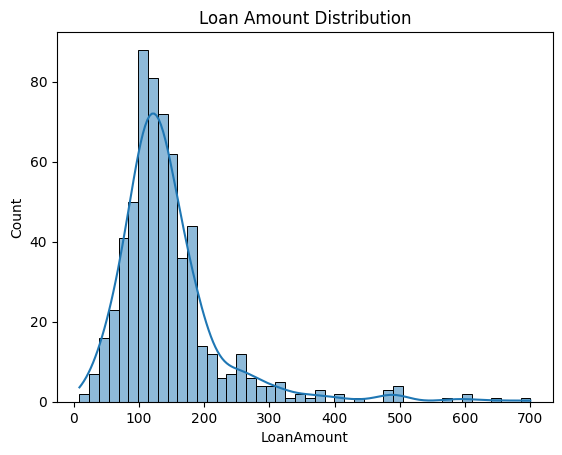

In [18]:
sns.histplot(df["LoanAmount"], kde=True) # Visulaize histogram for loan Amount
plt.title("Loan Amount Distribution")

Text(0, 0.5, 'Total Income')

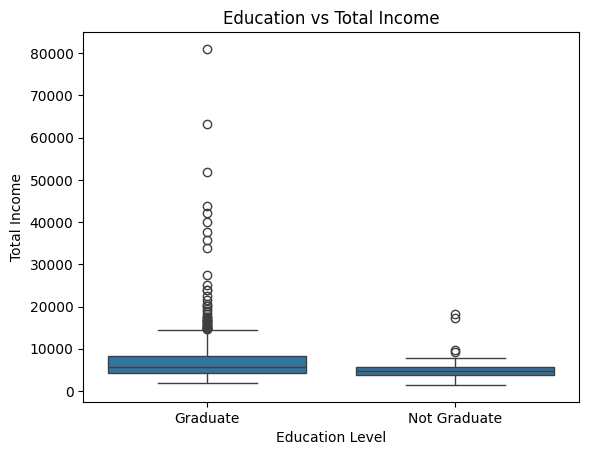

In [9]:
df['TotalIncome'] = df['CoapplicantIncome'] + df['ApplicantIncome'] # Adding CoapplicantIncome and ApplicantIncome data and Store it in TotalIncome column
sns.boxplot(data=df, x='Education', y='TotalIncome') # Visualize boxplot to check outliers
plt.title('Education vs Total Income') #
plt.xlabel('Education Level')
plt.ylabel('Total Income')

In [10]:
le = LabelEncoder() # It converts text data into numeric
categorical_cols = df.select_dtypes(include='object').columns # Select all the Categorical columns

for col in categorical_cols: # loop for all categorical columns
    df[col] = le.fit_transform(df[col]) # Assign numeric value to every unique category

In [11]:
X = df.drop("Loan_Status", axis=1) # drop the Loan_Status column
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # It splits the data in training and testing.

In [14]:
dt = DecisionTreeClassifier(random_state=42) # Create an object of Decision Tree Classifier
dt.fit(X_train, y_train) # Train the model on Training data

DecisionTreeClassifier(random_state=42)

In [15]:
y_pre = dt.predict(X_test) # Prediction on Testing data
y_pre

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
accuracy_score(y_test, y_pre) # Calculates model accuracy
confusion_matrix(y_test, y_pre) # Comparision between Actual and Predicted values

array([[22, 21],
       [22, 58]])